# Data Quick View

It is very convenient to have a quick look at the data before more structured analyses or do ad-hoc profiling of the data with SMV.

In [1]:
import smv
from pandas import *
from pyspark.sql import HiveContext, DataFrame
from pyspark.sql.functions import col, sum, lit

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
ls()


com.mycompany.testapp.stage1:
  (O) stage1.EmploymentByState
  (F) stage1.input.employment

com.mycompany.testapp.stage2:
  (O) stage2.StageEmpCategory
  (L) stage2.input.EmploymentStateLink


In [3]:
# run/load modules
#raw = ddf("com.mycompany.testapp.stage1.input.employment")
#out1 = ddf("com.mycompany.testapp.stage1.EmploymentByState")
raw = openCsv("data/input/employment/CB1200CZ11.csv")

In [8]:
#self-defined functions with pandas applied
DataFrame.smvPdHead = lambda df, n: df.toPandas().head(n)
DataFrame.smvPdFreqHist = lambda df,col: df.toPandas()[col].value_counts().plot(kind='bar')


### 1. A quick peek at the data

quick peek of data schema and the first row

In [4]:
raw.peek()
#raw.smvPdHead(5)

ST:String            = 01
ZIPCODE:String       = 35004
GEO_ID:String        = 8610000US35004
GEO_TTL:String       = 35004(MOODY,AL)
FOOTID_GEO:String    = null
NAICS2012:Integer    = 0
NAICS2012_TTL:String = Total for all sectors
FOOTID_NAICS:String  = null
YEAR:String          = 2012
ESTAB:Integer        = 167
ESTAB_F:String       = null
EMP:Integer          = 2574
EMP_F:String         = null
EMP_N:Integer        = 0
EMP_N_F:String       = H
PAYQTR1:Integer      = 19448
PAYQTR1_F:String     = null
PAYQTR1_N:Integer    = 0
PAYQTR1_N_F:String   = H
PAYANN:Integer       = 83803
PAYANN_F:String      = null
PAYANN_N:Integer     = 0
PAYANN_N_F:String    = H



**2.Quick distribution check**

In [5]:
out1.smvEdd()

ST                   Non-Null Count         52
ST                   Min Length             2
ST                   Max Length             2
ST                   Approx Distinct Count  52
EMP                  Non-Null Count         52
EMP                  Average                2170425.7884615385
EMP                  Standard Deviation     2330941.3442028034
EMP                  Min                    202724.0
EMP                  Max                    1.2319102E7
EMP_avg              Non-Null Count         52
EMP_avg              Average                55086.01786556828
EMP_avg              Standard Deviation     378700.63383193465
EMP_avg              Min                    694.3002610966057
EMP_avg              Max                    2733406.0



**3.Check the distribution of certain columns**

In [21]:
raw.smvHist("ST")

Histogram of ST: String sort by Key
key                      count      Pct    cumCount   cumPct
01                         770    1.98%         770    1.98%
02                         260    0.67%        1030    2.65%
04                         515    1.33%        1545    3.98%
05                         658    1.70%        2203    5.68%
06                        2457    6.33%        4660   12.00%
08                         608    1.57%        5268   13.57%
09                         397    1.02%        5665   14.59%
10                          86    0.22%        5751   14.82%
11                         172    0.44%        5923   15.26%
12                        1439    3.71%        7362   18.97%
13                         914    2.35%        8276   21.32%
15                         130    0.33%        8406   21.65%
16                         301    0.78%        8707   22.43%
17                        1508    3.88%       10215   26.32%
18                         920    2.37%       111

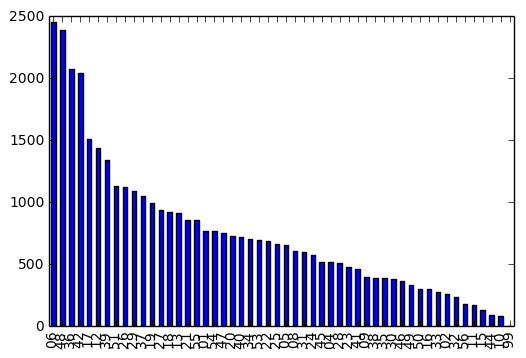

In [26]:
raw.smvPdFreqHist("ST")

In [16]:
out1.select(col("EMP").smvNullSub(0).alias("EMP_bin")).show()

TypeError: 'Column' object is not callable